Taller 5
\
Thomas Jara
\
Santiago Lizarazo

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy.optimize import curve_fit
from scipy.signal import find_peaks,peak_widths
from scipy.special import wofz
import matplotlib.animation as animation
from matplotlib.animation import FFMpegWriter
from numpy.random import uniform as unif
import scipy
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
from scipy.integrate import odeint

Punto 1
\
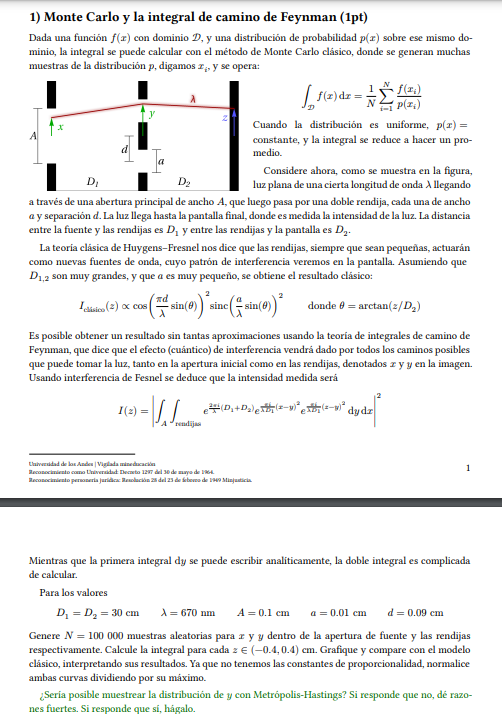

In [25]:
#Valores iniciales,todo en metros
d1=0.3
d2=d1
longitud_onda=670*10**(-9)
A=0.001
a=0.0001
d=0.0009
N=10000
z=np.linspace(-0.004,0.004,N)


Modelo Clasico

In [26]:
def intensidad_clasico(z,a,longitud_onda,d):
    theta=np.arctan(z/0.3)
    resultado=(np.cos(((np.pi*d)/longitud_onda)*np.sin(theta))**2)*(np.sinc((a/longitud_onda)*np.sin(theta))**2)
    return resultado
modelo_clasico=intensidad_clasico(z,a,longitud_onda,d1)
modelo_clasico=modelo_clasico/np.max(modelo_clasico)

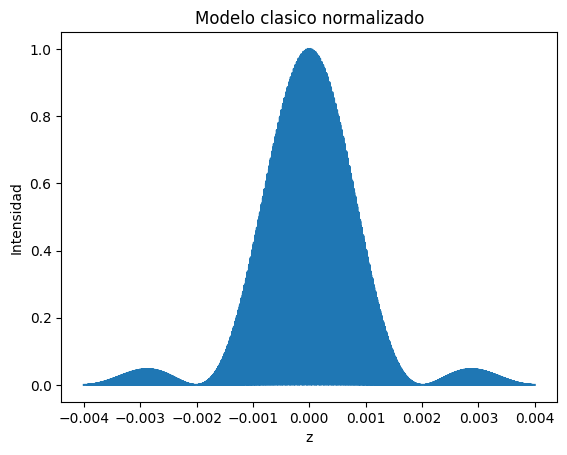

In [27]:
plt.plot(z,modelo_clasico)
plt.title('Modelo clasico normalizado')
plt.xlabel('z')
plt.ylabel('Intensidad')
plt.show()

Modelo Cuantico

In [28]:
x=unif(-A/2,A/2,N)
y1=unif(-d/2-a,-d/2,N//2)
y2=unif(d/2,d/2+a,N//2)
y=np.concatenate([y1,y2])
def montecarlo(f,a1,b1,M=N):
    suma=[]
    for i in range(M):
        suma.append(f[i]*((b1-a1)/M))
    return suma

def modelo_cuantico(x,y,z,d1=d1,longitud_onda=longitud_onda):
    resultado=(np.exp(((2*np.pi*complex(0,1))/longitud_onda)*(2*d1)))*(np.exp(((np.pi*complex(0,1))/(longitud_onda*d1))*(x-y)**2))*(np.exp(((np.pi*complex(0,1))/(longitud_onda*d1))*(z-y)**2))
    return resultado

resultados_modelo_cuantico=[]
resultados_primera=[]
for i in range(N):
    resultados=modelo_cuantico(x,y,z[i])
    resultado=np.sum(resultados)*1/N*A
    resultados_primera.append(resultado)
for i in range(N):
    resultado=resultados_primera[i]*1/N*(a)+resultados_primera[i]*1/N*(d+a)
    resultados_modelo_cuantico.append(resultado)
resultados_modelo_cuantico=np.abs(resultados_modelo_cuantico)**2
resultados_modelo_cuantico=resultados_modelo_cuantico/np.max(resultados_modelo_cuantico)



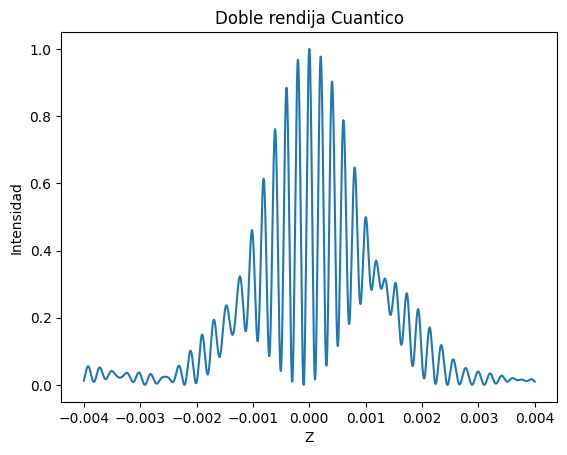

In [29]:
plt.plot(z,resultados_modelo_cuantico)
plt.title('Doble rendija Cuantico')
plt.xlabel('Z')
plt.ylabel('Intensidad')
plt.show()

La grafica clasica nos muestra un maximo de intensidad centrado y a sus lados otros dos maximos. Entre pico y pico su intensidad llega a cero dando cuenta de un patron absolutamente destructivo y constuctivo. No obstante la grafica cuantica nos muestra un patron principal que se va reduciendo conforme se aleja del centro. Es decir, no tiene unos picos secundarios bien definidos como en la forma clasica. Adicionalmente el modelo cuantico muestra como en ciertas regiones esta insidad a pesar de variar no van a ser cero. Esto se muestra en estos espacios en blanco con forma de dos picos vacios.Este modelo cuantico nos indica que las condiciones que se acercan mas a las simulaciones cuanticas no son perfectamente igual a las clasicas.

Punto 2
\
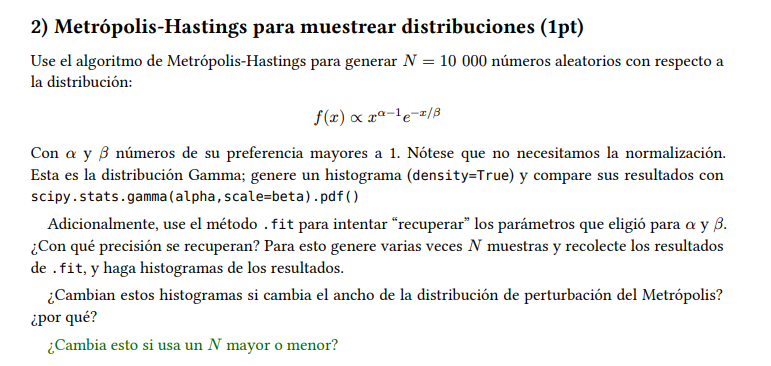

Punto 5.2

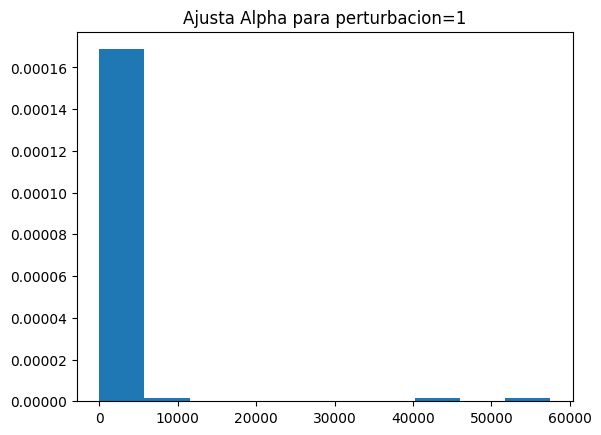

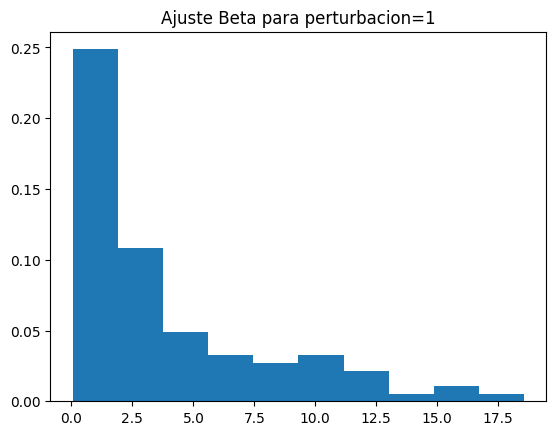

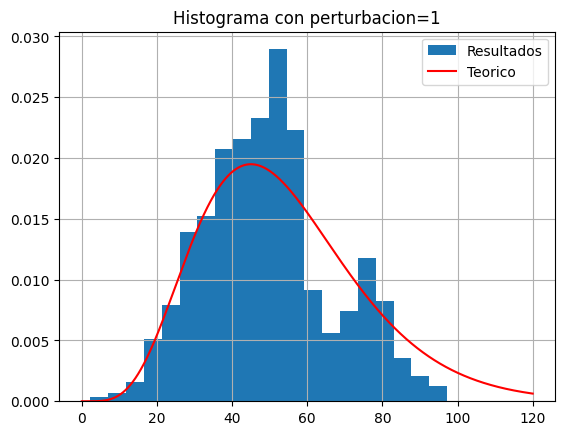

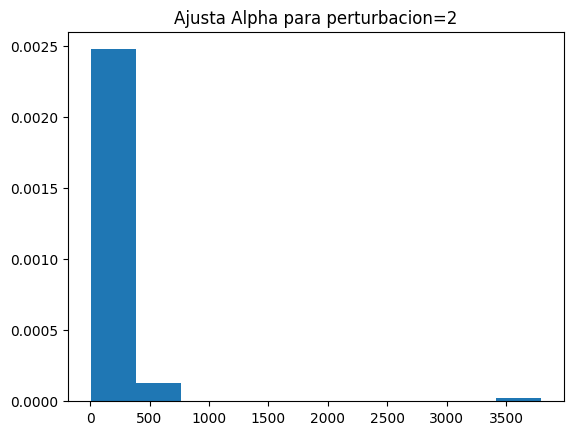

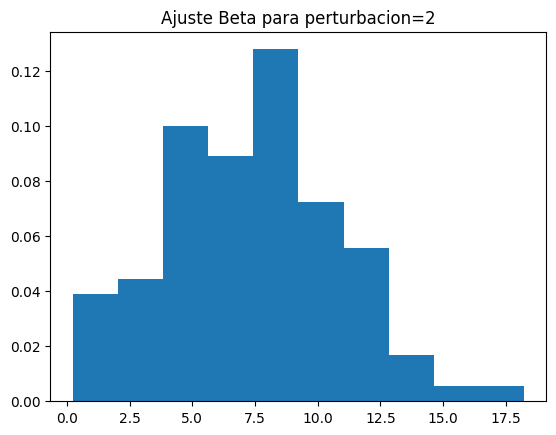

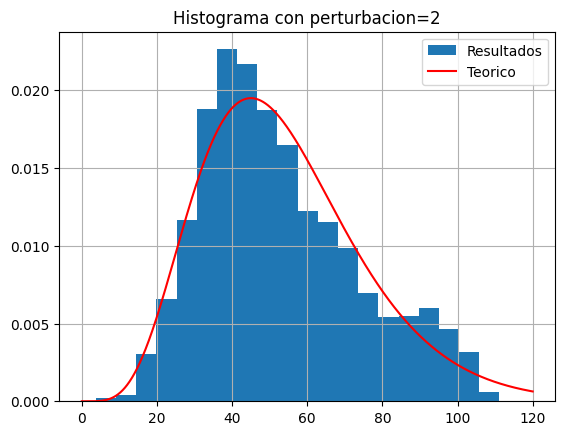

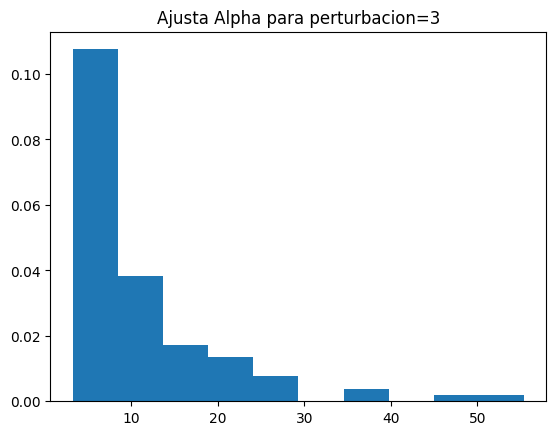

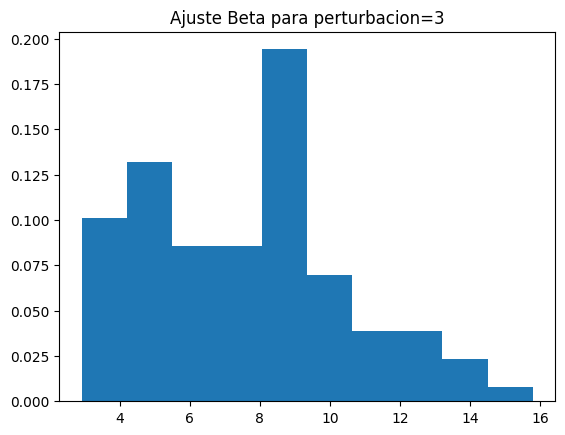

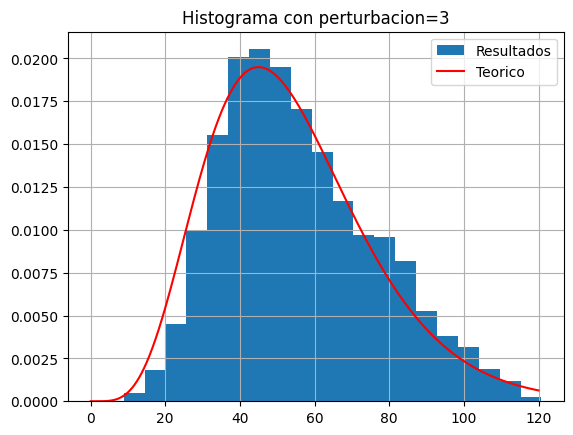

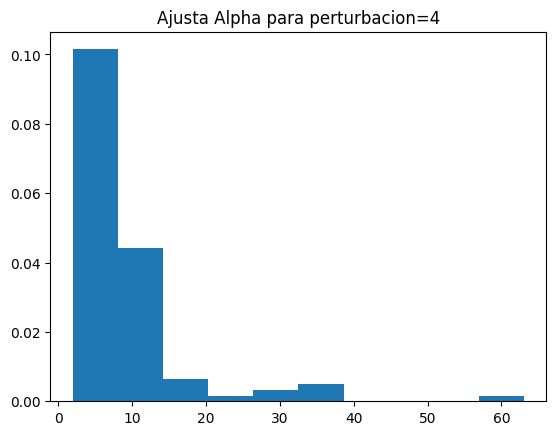

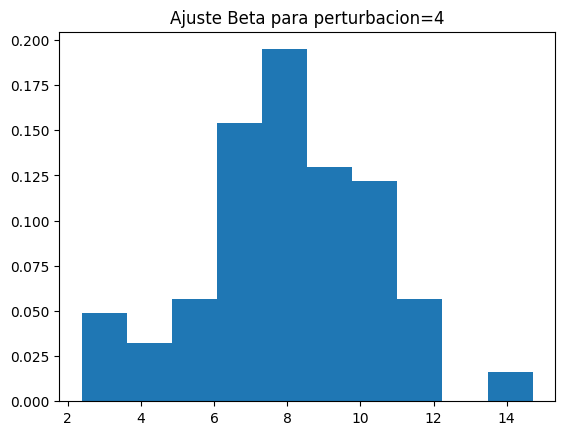

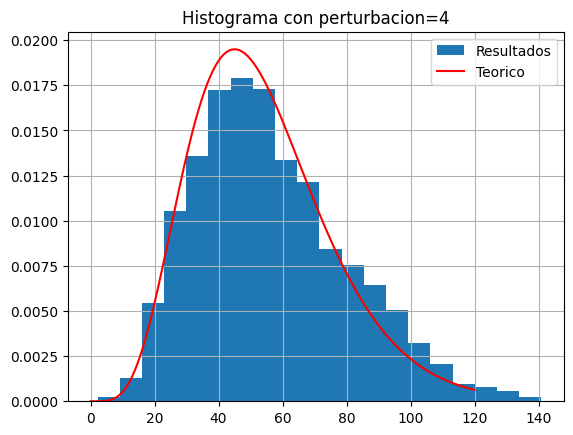

In [30]:
N=10000
x=np.linspace(0,120,N)
perturbaciones=[1,2,3,4]
a=6
b=9
def distribuicion(x,a,b):
    return (x**(a-1))*np.exp(-x/b)

def metropolis_hastings(distribuicion,N,pert,x_inicial):
    muestras=[]
    x0=x_inicial
    for i in range(N):
        candidato=np.random.normal(x0,pert)
        razon_de_aceptacion=distribuicion(candidato,a,b)/distribuicion(x0,a,b)
        if np.random.rand()<razon_de_aceptacion:
            x0=candidato
        muestras.append(x0)
    return muestras

for i in perturbaciones:
    a_fit=[]
    b_fit=[]
    for j in range(100):
        muestras=metropolis_hastings(distribuicion,N,i,3)
        params=scipy.stats.gamma.fit(muestras)
        a_fit.append(params[0])
        b_fit.append(params[2])
    plt.hist(a_fit,density=True)
    plt.title('Ajusta Alpha para perturbacion='+str(i))
    plt.show()
    plt.hist(b_fit,density=True)
    plt.title('Ajuste Beta para perturbacion='+str(i))
    plt.show()
    plt.hist(metropolis_hastings(distribuicion,N,i,3),bins=20,density=True,label='Resultados')
    plt.plot(x,scipy.stats.gamma.pdf(x,a,scale=b),label='Teorico',color='r')
    plt.title('Histograma con perturbacion='+str(i))
    plt.legend()
    plt.grid()
    plt.show()


En primer lugar comparando el histograma con la funcion original se puede observar que mayor ancho de la distribuicion de perturbacion se puede asemejar mas a la funcion original. Ademas los valores originales del fit de alpha y beta se acercan mas a los valores que impusimos inicialmente. Esto se debe a que a perturbaciones pequeñas el algoritmo propone candidatos muy cercanos a las valor actual por lo cual convergira de una forma muy lenta y se necesitaria un gran numero de muestras. Por otro lado, si la perturbacion es muy grande, permite tomar un rango mas amplio de valores pero a su vez tiene que rechazar un mayor numero de candidatos.

Punto 3
\
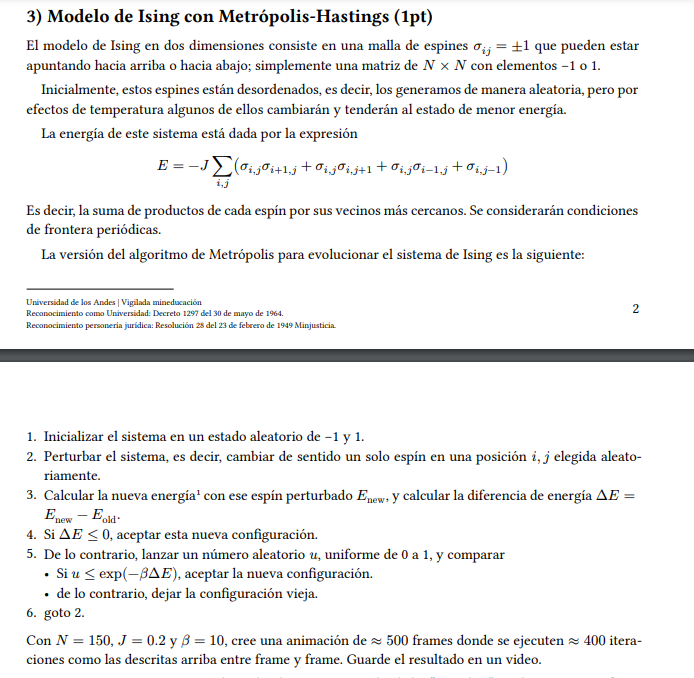

IndexError: list index out of range

Error in callback <function _draw_all_if_interactive at 0x0000026F22FBCF70> (for post_execute):


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1mUntyped global name 'energia':[0m [1m[1mCannot determine Numba type of <class 'function'>[0m
[1m
File "..\..\..\..\AppData\Local\Temp\ipykernel_28680\61609935.py", line 18:[0m
[1m<source missing, REPL/exec in use?>[0m
[0m

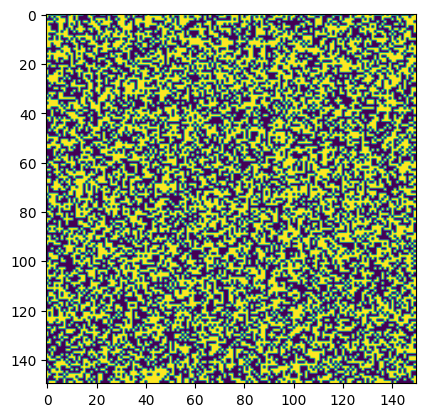

In [31]:
from numba import njit
N=150
malla=np.random.choice([-1,1],size=(N,N))
J=0.2
b=10
iteraciones=400
def energia(malla,J):
    Energia=0
    for i in range(N):
        for j in range(N):
            Energia=J * malla[i, j] * (
                malla[(i + 1) % N, j] + malla[i, (j + 1) % N] +
                malla[(i - 1) % N, j] + malla[i, (j - 1) % N])
                #use chatGPT para sacar esta formula porque siempre me daba la misma energia
    return Energia
@njit
def metropolis_ising(malla,J,b,iteraciones):
    e_old=energia(malla,J)
    for h in range(iteraciones):
        i=np.random.randint(0,N)
        j=np.random.randint(0,N)
        spin_original=malla[i][j]
        malla[i][j]=-1*malla[i][j]
        e_new=energia(malla,J)
        delta_e=e_new-e_old
        if delta_e<=0:
            e_old=e_new
        else:
            if np.random.rand()<np.exp(-b*delta_e):
                e_old=e_new
            else:
                malla[i][j]=spin_original
    return malla
fig, ax = plt.subplots()
im = ax.imshow(malla, animated=True)
def actualizar(frame):
    metropolis_ising(malla, J, b, iteraciones)
    im.set_array(malla)
    return [im]

# Crear la animación
ani = FuncAnimation(fig, actualizar, frames=500, blit=False)

# Guardar la animación como un archivo de video
ani.save('Modelo_ising.gif', writer=PillowWriter(fps=10))

# Mostrar la animación
plt.show()

Punto 4
\
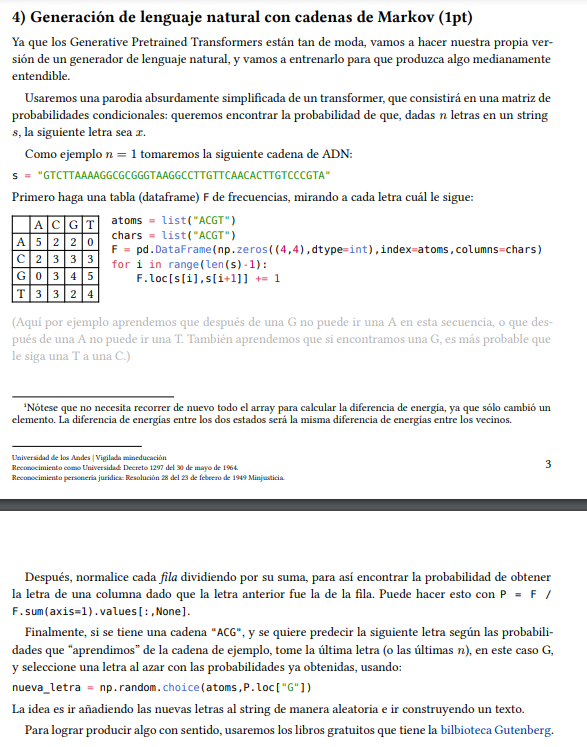
\
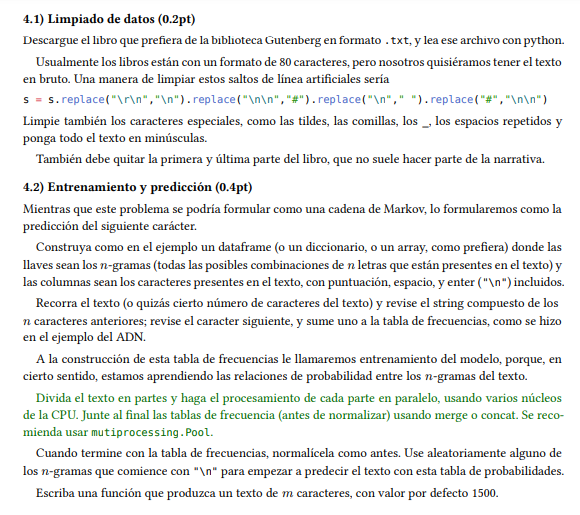
\
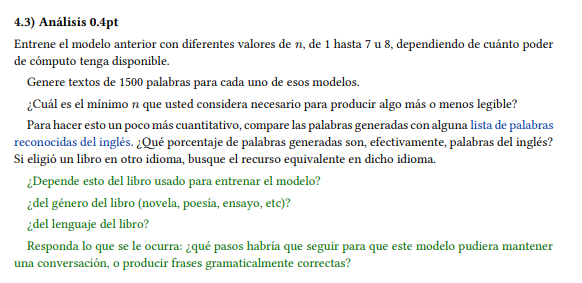

4.1

In [33]:
import re
import unicodedata
with open('Libro.txt','r',encoding='utf-8') as archivo:
    s = archivo.read()
s = s.replace("\r\n","\n").replace("\n\n","#").replace("\n"," ").replace("#","\n\n")
s = unicodedata.normalize('NFKD', s) 
s = re.sub(r'[^a-zA-Z0-9\s.,;:!?\'\"()\-\\n]', '', s)
s = re.sub(r'\s+', ' ', s)            
s = s.lower()  
@njit
def crear_ngrams(s,n):
    ngrams=[s[i:i+n]for i in range(len(s)-n)]
    return ngrams
n=5
ngrams=crear_ngrams(s,n)
chars=set(s)
F = pd.DataFrame(np.zeros((len(ngrams), len(chars)), dtype=int), index=ngrams, columns=sorted(chars))
for i in range(len(s) - n):
    ngrama = s[i:i+n]
    siguiente_caracter = s[i+n]
    F.loc[ngrama, siguiente_caracter] += 1
P=F/F.sum(axis=1).values[:,None]


,,!,(,),",",-,.,:,;,?,...,q,r,s,t,u,v,w,x,y,z
one m,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0
ne mo,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
e mor,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
morn,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
morni,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ung b,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ng bo,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g bod,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
body,0.833333,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.041667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


4.2

In [39]:
#Utilizamos ayuda de ChatGPT porque la funcion de generar texto nos estaba generando un error cuando el ultimo ngrama del texto no existia dentro del aprendizaje de nuestro GPT

# """def generar_texto(cadena,P,len_texto,n):
#     nuevo_texto=cadena
#     palabras=nuevo_texto.split(' ')
#     nueva_letra=''
#     while len(palabras)<=len_texto:
#         #print(len(palabras))
#         if nuevo_texto[-n:] in P.index:
#             if np.all(P.loc[nuevo_texto[-n:]].head(1).values[0]>0):
#                 nueva_letra=np.random.choice(list(P.columns),p=P.loc[nuevo_texto[-n:]].head(1).values[0])
#                 nuevo_texto+=str(nueva_letra)
#                 palabras=nuevo_texto.split(' ')
#             else:
#                 nuevo_texto += np.random.choice(list(P.index))
#         else:
#             nuevo_texto += np.random.choice(list(P.index))
#     return nuevo_texto
# generar_texto('samsa',P,1500,n)"""
#En forma es muy parecida a la original pero modifica una serie de condicionales que seleccionan un caracter al azar cuando este ngrama no se encuentre en el entrenamiento.
caracteres_validos = set("abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ.,;:!?\'\"()\- \n")

def generar_texto(cadena, P, len_texto, n):
    nuevo_texto = cadena
    palabras = nuevo_texto.split(' ')
    
    while len(palabras) <= len_texto:
        ngrama_actual = nuevo_texto[-n:]  # Extrae el último n-grama
        
        if ngrama_actual in P.index:
            # Obtener la fila de probabilidades del n-grama actual
            probabilidades = P.loc[ngrama_actual].values.flatten()  # Asegurarse de obtener un array unidimensional
            
            # Verificar que las probabilidades sumen más de 0 y que sean válidas
            if probabilidades.size > 0 and np.sum(probabilidades) > 0:
                probabilidades /= np.sum(probabilidades)  # Normalizar las probabilidades
                
                # Filtrar solo caracteres válidos para la generación
                caracteres_validos_array = [c for c in P.columns if c in caracteres_validos]
                probabilidades_validas = [probabilidades[i] for i, c in enumerate(P.columns) if c in caracteres_validos]
                
                # Asegurarse de que las probabilidades sumen a 1
                probabilidades_validas = np.array(probabilidades_validas) / np.sum(probabilidades_validas)
                
                # Elegir la siguiente letra según las probabilidades
                nueva_letra = np.random.choice(caracteres_validos_array, p=probabilidades_validas)
            else:
                # Si las probabilidades no son válidas, elige una letra válida al azar
                nueva_letra = np.random.choice(list(caracteres_validos))
        else:
            # Si el n-grama no está en el índice, elige una letra válida al azar
            nueva_letra = np.random.choice(list(caracteres_validos))
        
        # Añadir la nueva letra al texto
        nuevo_texto += str(nueva_letra)
        palabras = nuevo_texto.split(' ')
        
        # Mostrar el texto y la nueva letra generada
        #print(f"Nuevo texto: {nuevo_texto}")
        #print(f"Nueva letra: {nueva_letra}")
    
    return nuevo_texto

# Llamar a la función
print(generar_texto('samsa', P, 1500, n))

samsa, but grete, with responsibilityprobably could go some time of how they were pursue the ground there started to him. he was his father, who had just a completely, even slightest showed the whole everywhere even left it was nothings back and mrs. samsa were a funny sort of bring into the other sides. with out the room a travelling, it was absolutely cooked round each other were very day before here he had done at last night in selfish, thought the dawning had not like that it was no more deeply took holding of gregor was blossoming, but down into his way off and flew at the boss would simple even in the door to the glimpsed finally been lock with tears of meat whispered: gregors elderly with all the door she knew for than thats just did not possible, he large new method was condition slowly. if it because he was become in they appeared his sister was nothings backwardly, now he was some time was a result of courselves outside door and there that was now it hurried up a life, was no

4.3

In [40]:
lista_n=[1,2,3,4,5]
Lista_resultados=[]
for n in lista_n:
    ngrams=crear_ngrams(s,n)
    chars=set(s)
    F = pd.DataFrame(np.zeros((len(ngrams), len(chars)), dtype=int), index=ngrams, columns=sorted(chars))
    for i in range(len(s) - n):
        ngrama = s[i:i+n]
        siguiente_caracter = s[i+n]
        F.loc[ngrama, siguiente_caracter] += 1
    P=F/F.sum(axis=1).values[:,None]
    Lista_resultados.append(generar_texto('samsa',P,1500,n))

KeyboardInterrupt: 

Se demoro mas de tres horas en correr :(
Pero juro que si funciona solo que no me da la tostadora 

Evaluando

In [ ]:
porcentajes=[]
with open('words_alpha.txt','r',encoding='utf-8') as archivo:
    lineas=archivo.readlines()
for i in Lista_resultados:
    palabras=i.strip(' ',',','.')
    contador=0
    for palabra in palabras:
        if palabra in lineas:
            contador+=1 
    porcentajes.append(contador/1500)
plt.plot(n,porcentajes)
plt.title('Eficiencia segun el n-grama')
plt.ylabel('Eficiencia%')
plt.xlabel('n')
plt.show()




Punto 5
\
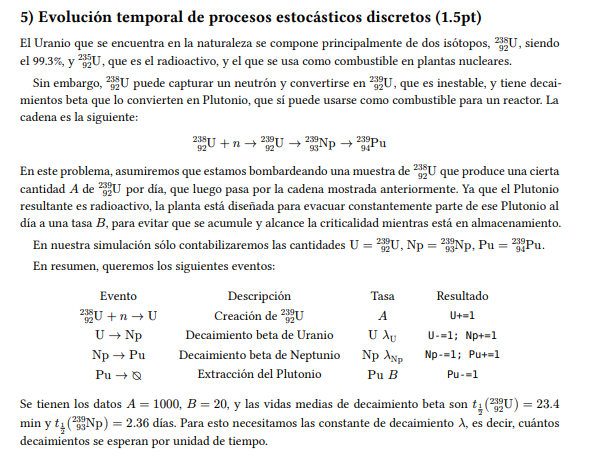
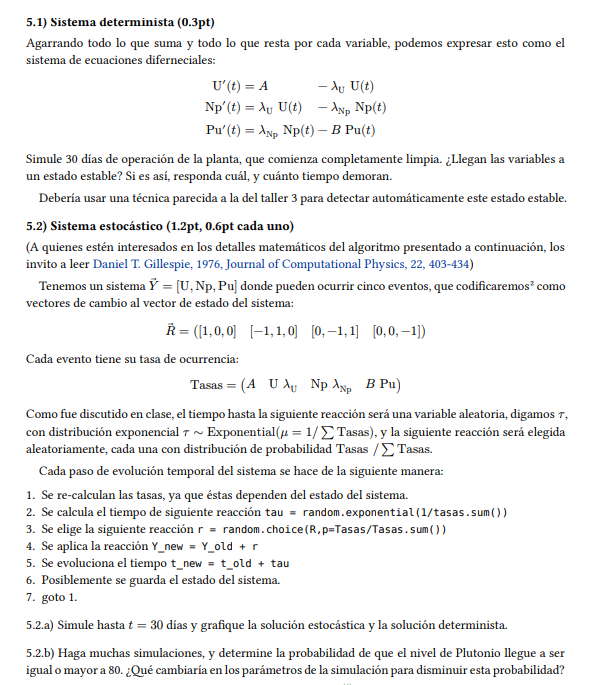

5.1

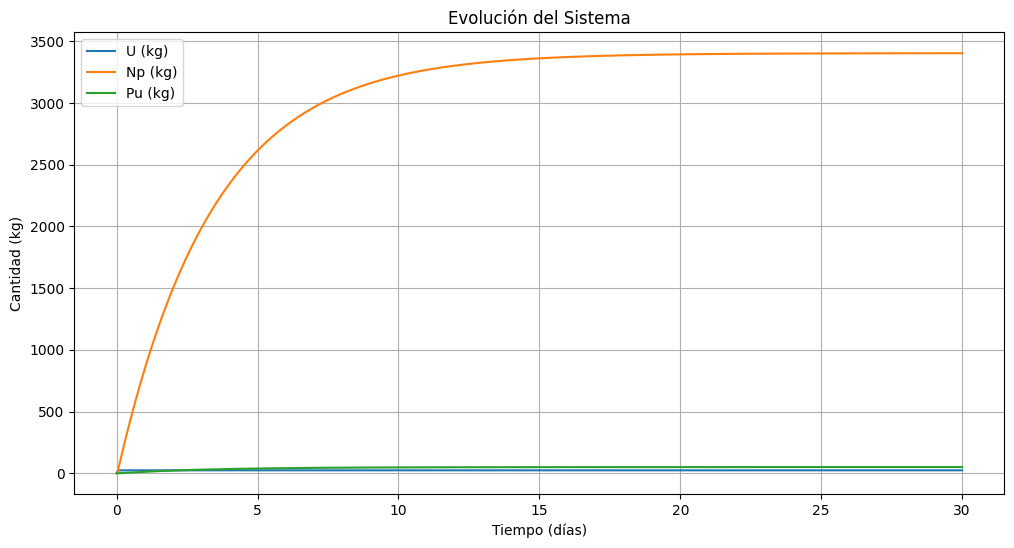

In [41]:


A = 1000                   
B = 20                    
lambda_U = np.log(2) / 0.01625  
lambda_Np = np.log(2) / 2.36  


t_final = 30  
tiempo = np.linspace(0, t_final, num=1000) 


U0 = 0
Np0 = 0
Pu0 = 0
initial_conditions = [U0, Np0, Pu0]


def modelo(y, t):
    U, Np, Pu = y
    dU_dt = A - lambda_U * U
    dNp_dt = lambda_U * U - lambda_Np * Np
    dPu_dt = lambda_Np * Np - B * Pu
    return [dU_dt, dNp_dt, dPu_dt]


sol = odeint(modelo, initial_conditions, tiempo)


plt.figure(figsize=(12, 6))
plt.plot(tiempo , sol[:, 0], label='U (kg)')
plt.plot(tiempo , sol[:, 1], label='Np (kg)')
plt.plot(tiempo , sol[:, 2], label='Pu (kg)')
plt.xlabel('Tiempo (días)')
plt.ylabel('Cantidad (kg)')
plt.title('Evolución del Sistema')
plt.legend()
plt.grid()
plt.show()




El Neptunio llega a un estado estable a partir de los 25 dias aproximadamente, donde crece hasta llegar un limite de cantidad cercano a los 3500kg. Por otro lado los valores de Uranio y los de Plutonio crecen linealmente pero con un crecimiento muy corto

5.2